# EDA for Boston Crime Incident Reports - 2023 to Present #

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [8]:
offense_codes = pd.read_excel('RMS Offense Codes.xlsx')
offense_codes.head()


,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [16]:
data = pd.read_csv('Boston Data.csv', encoding='latin')
data['DAY_OF_WEEK'] = data['DAY_OF_WEEK'].str.strip()
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])
#data = data.merge(offense_codes[['CODE', 'NAME']], on='OFFENSE_CODE', how='left')
data.head()

/var/folders/kv/0_31hrdn1g53jqh92jb59z080000gn/T/ipykernel_87589/3396727213.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Boston Data.csv', encoding='latin')


,ï»¿_id,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,1,232007173,3115,NaN,INVESTIGATE PERSON,B3,,0,2023-01-27 22:44:00+00:00,2023,1,Friday,22,NaN,FAVRE ST,42.271661,-71.099535,"(42.271661031027065, -71.09953455161765)"
1,2,232004454,3301,NaN,VERBAL DISPUTE,B2,316,0,2023-01-17 20:21:00+00:00,2023,1,Tuesday,20,NaN,HAROLD ST,42.312596,-71.092876,"(42.3125962960786, -71.09287583752645)"
2,3,232006290,3115,NaN,INVESTIGATE PERSON,A1,,0,2023-01-24 00:00:00+00:00,2023,1,Tuesday,0,NaN,HANOVER ST,42.365699,-71.052892,"(42.3656993584582, -71.05289203191269)"
3,4,232024939,3114,NaN,INVESTIGATE PROPERTY,B3,,0,2023-03-31 17:14:00+00:00,2023,3,Friday,17,NaN,BLUE HILL AVE,42.292788,-71.088520,"(42.29278799134922, -71.08851953962399)"
4,5,232006708,423,NaN,ASSAULT - AGGRAVATED,B2,,0,2023-01-26 09:00:00+00:00,2023,1,Thursday,9,NaN,HUTCHINGS ST,42.310269,-71.089311,"(42.310268910354935, -71.08931055058088)"


/var/folders/kv/0_31hrdn1g53jqh92jb59z080000gn/T/ipykernel_87589/3808370261.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Month_Year'] = data['OCCURRED_ON_DATE'].dt.to_period('M')


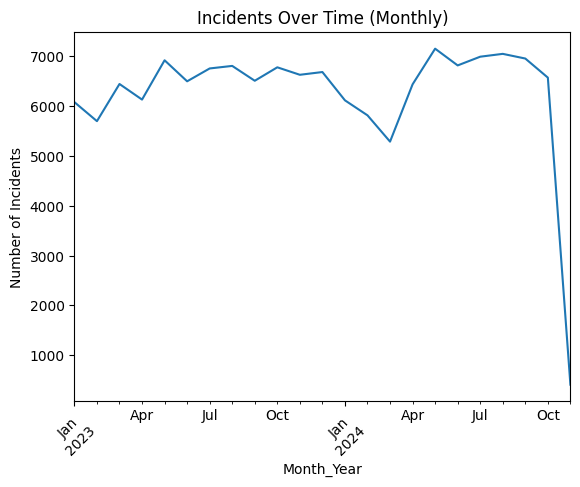

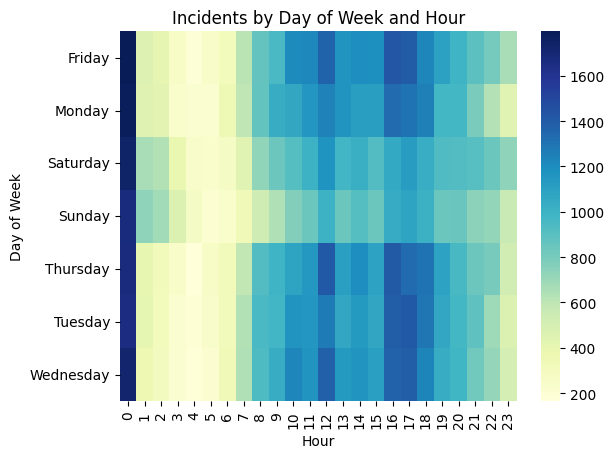

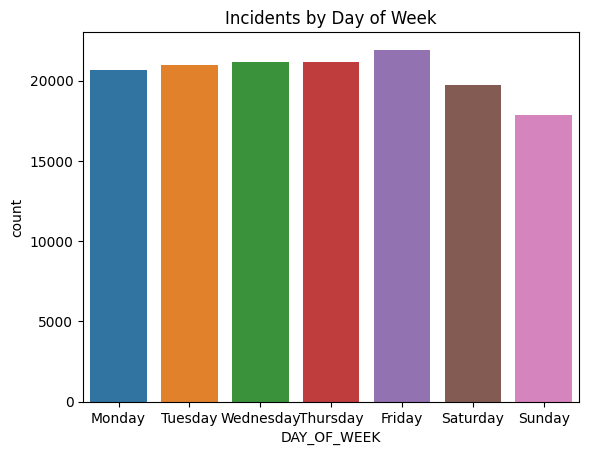

In [4]:
# Line Chart: Number of incidents over time by month
data['Month_Year'] = data['OCCURRED_ON_DATE'].dt.to_period('M')
monthly_counts = data['Month_Year'].value_counts().sort_index()
monthly_counts.plot(kind='line', title='Incidents Over Time (Monthly)', ylabel='Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# Heatmap: Incidents by Day of Week and Hour
day_hour = data.groupby(['DAY_OF_WEEK', 'HOUR']).size().unstack()
sns.heatmap(day_hour, cmap='YlGnBu', annot=False)
plt.title('Incidents by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

# Bar Chart: Incidents per Day of Week
sns.countplot(data=data, x='DAY_OF_WEEK', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Incidents by Day of Week')
plt.show()
